# Статистическое исследование данных

**Цель работы:** провести статистический анализ общих затрат на инновационную деятельность по субъектам Российский Федерации, чтобы оценить распределения затрат и ключевые характеристики затрат, а также сравнить с прошлыми годами.

## 1. Основная часть

### 1.1. Описание данных

- Источником данных, которые будут использоваться в анализе, является _Росстат_, раздел "_Инновации_", файл `.xls` "_Затраты на инновационную деятельность организаций (с 2010 г.)_", из которого извлечены три последние листа с данными за 2022 - 2024 гг. по субъектам РФ из **Центрального** и **Северо-Западного** регионов.
- Набор данных представляет собой общие затраты на инновационную деятельность относительно субъектов РФ, что выражено в млн. руб. (миллион рублей).
- Всего представлено 28 субъектов РФ, для каждого из которых выделено 3 года с информацией об общих затратах на инновационную деятельность.

Первым шагом, следует прописать все необходимые импорты в отдельном окне кода, для удобства перезапсука библиотек в случае ошибок. Будут использоваться математические библиотеки (`numpy`, `math`, `scipy`), а также библиотеки для графики, например диаграмм (`matplotlib`, `seaborn`), а также основная библиотека `pandas` для работы с файлами типа `.csv`.

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm, skew, kurtosis

In [3]:
df = pd.read_csv('innov_5_2024.csv', sep=';', decimal=',')  # Чтение
subjects_rf = df['Субъект РФ'].tolist()  # Преобразование столбцов данных в списки
values_2022 = df['2022'].tolist()
values_2023 = df['2023'].tolist()
values_2024 = df['2024'].tolist()
vals = [values_2022, values_2023, values_2024]

print(f"Список субъектов РФ: {subjects_rf}\n")  # Вывод информации о списках
for i in range(len(vals)):
    print(f"Список значений за 202{i+2} год: {vals[i]}\n")
display(df)

Список субъектов РФ: ['Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область', 'Ивановская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'Московская область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тверская область', 'Тульская область', 'Ярославская область', 'г. Москва', 'Республика Карелия', 'Республика Коми', 'Архангельская область', 'Вологодская область', 'Калининградская область', 'Ленинградская область', 'Мурманская область', 'Новгородская область', 'Псковская область', 'г. Санкт-Петербург']

Список значений за 2022 год: [27232.1, 2241.2, 7689.6, 19661.8, 671.0, 7067.0, 4036.3, 2842.3, 42888.8, 205693.1, 2981.0, 4046.7, 4001.9, 6581.0, 5260.9, 35404.9, 14359.8, 722407.5, 5535.4, 6374.6, 1501.0, 1827.9, 2970.4, 36367.7, 4717.0, 5100.3, 889.8, 145751.9]

Список значений за 2023 год: [20041.2, 2393.49, 10074.89, 19105.88, 1058.36, 10775.05, 679.95, 3645.71

,Субъект РФ,2022,2023,2024
0,Белгородская область,27232.1,20041.20,19248.86
1,Брянская область,2241.2,2393.49,3686.56
2,Владимирская область,7689.6,10074.89,14416.52
3,Воронежская область,19661.8,19105.88,28634.41
4,Ивановская область,671.0,1058.36,787.15
5,Калужская область,7067.0,10775.05,29490.86
6,Костромская область,4036.3,679.95,932.42
7,Курская область,2842.3,3645.71,8082.32
8,Липецкая область,42888.8,46669.43,28850.63
9,Московская область,205693.1,235330.94,295528.06


### 1.2. Формальное представление данных

Для корректности исследования, формат был приведен к виду распределения затрат по годам и субъектам. Были проведены следующие операции:

1.	Удалены строки, отвечающие за итоговые суммы и разделения по видам затрат.
2.	Выделены только те столбцы, имеющие отношение к анализированным годам.

### 1.3. Наглядное представление данных

На первом этапе статистического анализа выполнена визуализация данных для общего ознакомления со структурой и распределением изучаемой совокупности. Общие затраты на инновации по субъектам РФ за 2024 год представлены на вертикальной столбчатой диаграмме. 

Особенности визуализации:
- Каждый столбец снабжен индивидуальной подписью
- Подписи наклонены под углом 45 градусов для обеспечения удобочитаемости
- Легенда не используется, поскольку наименования субъектов РФ непосредственно указаны на диаграмме

Данный формат представления позволяет наглядно оценить распределение общих затрат на инновации среди различных регионов.

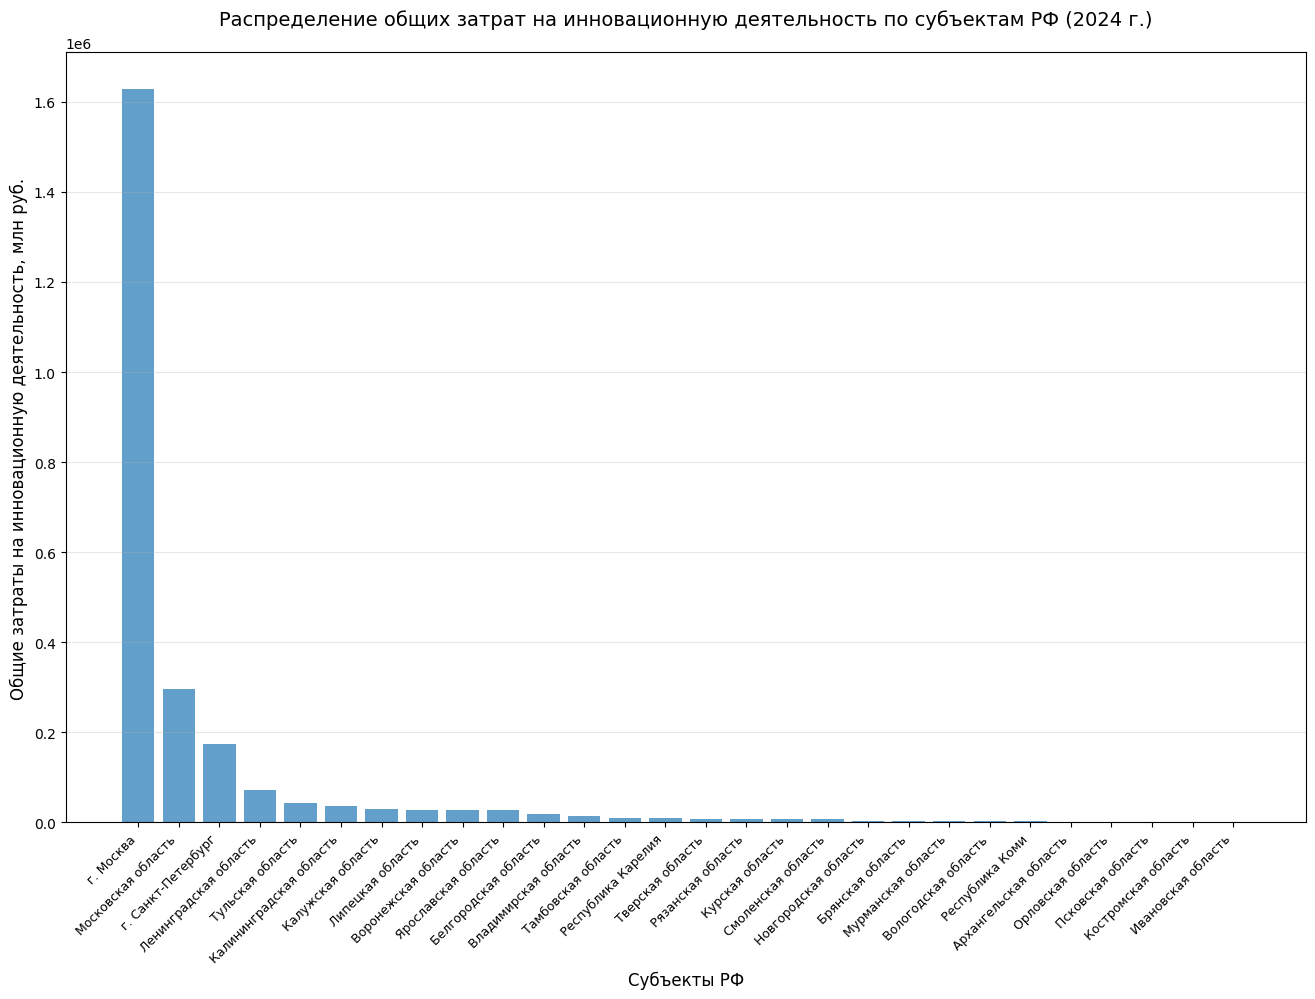

In [3]:
df_copy = df.copy()

sorted_df = df_copy.sort_values('2024', ascending=False)

plt.figure(figsize=(16, 10))

bars = plt.bar(range(len(sorted_df)), sorted_df['2024'], alpha=0.7)

plt.xticks(range(len(sorted_df)), sorted_df['Субъект РФ'], fontsize=9, rotation=45, ha='right')
plt.ylabel('Общие затраты на инновационную деятельность, млн руб.', fontsize=12)
plt.xlabel('Субъекты РФ', fontsize=12)
plt.title('Распределение общих затрат на инновационную деятельность по субъектам РФ (2024 г.)', fontsize=14, pad=20)

plt.grid(axis='y', alpha=0.3)

plt.show()

### 1.4. Числовые оценки числовых характеристик данных

Для оценки числовых характеристик разработан метод `descriptive_stats`, который считает и выводит все характеристики определенного набора данных, используя `numpy`.

In [4]:
def descriptive_stats(data):
    stats_innov = {}

    # Преобразуем данные в числовой формат (заменяем запятые на точки)
    if isinstance(data[0], str):
        data = [float(x.replace(',', '.')) for x in data]

    data = np.array(data)

    # 3.1 Среднее выборочное
    stats_innov['mean'] = np.mean(data)

    # 3.2 Выборочная дисперсия
    stats_innov['var_biased'] = np.var(data)          # смещённая
    stats_innov['var_unbiased'] = np.var(data, ddof=1)  # несмещённая

    # 3.3 Среднеквадратичное отклонение
    stats_innov['std'] = np.sqrt(stats_innov['var_unbiased'])

    # 3.4 Медиана
    stats_innov['median'] = np.median(data)

    # 3.5 Выборочное абсолютное отклонение от медианы
    stats_innov['mad'] = np.mean(np.abs(data - stats_innov['median']))

    # 3.6 Квартили
    stats_innov['q1'] = np.percentile(data, 25)
    stats_innov['q2'] = np.percentile(data, 50)  # медиана
    stats_innov['q3'] = np.percentile(data, 75)

    # 3.7 Интерквартильная широта
    stats_innov['iqr'] = stats_innov['q3'] - stats_innov['q1']

    # 3.8 Полусумма выборочных квартилей
    stats_innov['q_mid'] = (stats_innov['q1'] + stats_innov['q3']) / 2

    # 3.9 Экстремальные элементы
    stats_innov['min'] = np.min(data)
    stats_innov['max'] = np.max(data)

    # 3.10 Размах выборки
    stats_innov['range'] = stats_innov['max'] - stats_innov['min']

    # 3.11 Полусумма экстремальных элементов
    stats_innov['mid_range'] = (stats_innov['min'] + stats_innov['max']) / 2

    # 3.12 Выборочная оценка асимметрии
    stats_innov['skewness'] = skew(data)

    # 3.13 Выборочная оценка эксцесса
    stats_innov['kurtosis'] = kurtosis(data)  # избыточный эксцесс (0 для нормального распределения)

    print(f"3.1. Среднее выборочное: {stats_innov['mean']:.1f} млн руб.")
    print(f"3.2. Выборочная дисперсия:")
    print(f"\t- Смещенная: {stats_innov['var_biased']:.1f}")
    print(f"\t- Несмещенная: {stats_innov['var_unbiased']:.1f}")
    print(f"3.3. Выборочное среднее квадратичное отклонение: {stats_innov['std']:.1f} млн руб.")
    print(f"3.4. Медиана: {stats_innov['median']:.1f} млн руб.")
    print(f"3.5. Выборочное абсолютное отклонение: {stats_innov['mad']:.1f} млн руб.")
    print(f"3.6. Квартили:")
    print(f"\t- Q1 (25-й процентиль): {stats_innov['q1']:.1f} млн руб.")
    print(f"\t- Q2 (медиана): {stats_innov['q2']:.1f} млн руб.")
    print(f"\t- Q3 (75-й процентиль): {stats_innov['q3']:.1f} млн руб.")
    print(f"3.7. Интерквартильная широта: {stats_innov['iqr']:.1f} млн руб.")
    print(f"3.8. Полусумма выборочных квартилей: {stats_innov['q_mid']:.1f} млн руб.")
    print(f"3.9. Экстремальные элементы:")
    print(f"\t- Минимум: {stats_innov['min']:.1f} млн руб.")
    print(f"\t- Максимум: {stats_innov['max']:.1f} млн руб.")
    print(f"3.10. Размах выборки: {stats_innov['range']:.1f} млн руб.")
    print(f"3.11. Полусумма экстремальных элементов: {stats_innov['mid_range']:.1f} млн руб.")
    print(f"3.12. Выборочная оценка асимметрии: {stats_innov['skewness']:.2f}")
    print(f"3.13. Выборочная оценка эксцесса: {stats_innov['kurtosis']:.2f}")


# Вычисление статистик
descriptive_stats(values_2024)

3.1. Среднее выборочное: 88307.8 млн руб.
3.2. Выборочная дисперсия:
	- Смещенная: 91521370729.5
	- Несмещенная: 94911051126.9
3.3. Выборочное среднее квадратичное отклонение: 308076.4 млн руб.
3.4. Медиана: 9415.8 млн руб.
3.5. Выборочное абсолютное отклонение: 84364.2 млн руб.
3.6. Квартили:
	- Q1 (25-й процентиль): 3359.3 млн руб.
	- Q2 (медиана): 9415.8 млн руб.
	- Q3 (75-й процентиль): 29010.7 млн руб.
3.7. Интерквартильная широта: 25651.4 млн руб.
3.8. Полусумма выборочных квартилей: 16185.0 млн руб.
3.9. Экстремальные элементы:
	- Минимум: 787.1 млн руб.
	- Максимум: 1628038.2 млн руб.
3.10. Размах выборки: 1627251.1 млн руб.
3.11. Полусумма экстремальных элементов: 814412.7 млн руб.
3.12. Выборочная оценка асимметрии: 4.71
3.13. Выборочная оценка эксцесса: 20.98


### 1.5. Оценка плотности распределения

Для визуальной оценки характера распределения общих затрат на инновации была построена гистограмма с наложенной кривой плотности распределения.

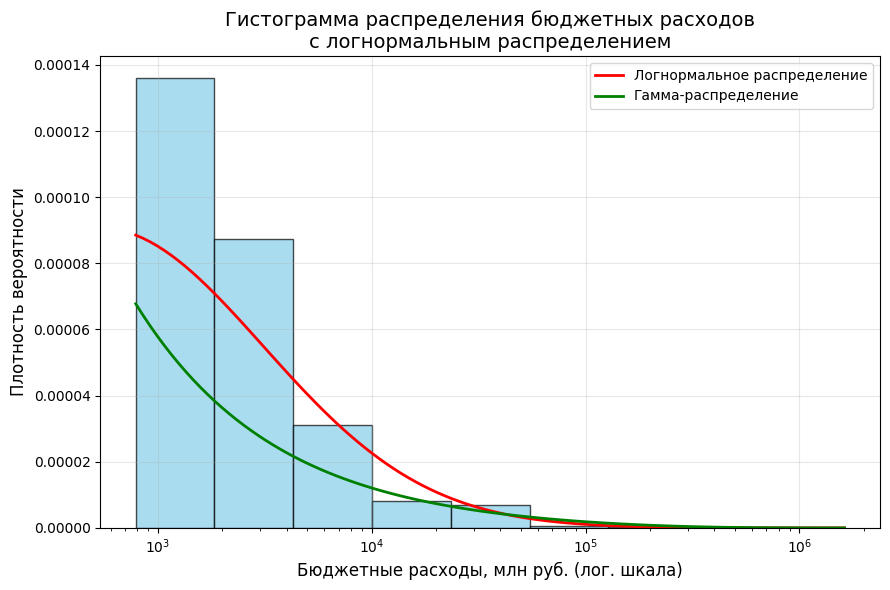


Критерий Колмогорова-Смирнова:
Логнормальное: D = 0.1045, p-value = 0.8890
Гамма:         D = 0.2712, p-value = 0.0261


In [49]:
log_values = np.log(values_2024)

# Создание композитного графика
fig, ax1 = plt.subplots(1, 1, figsize=(9, 6))

# Гистограмма исходных данных с логнормальным распределением
bins = np.logspace(np.log10(min(values_2024)), np.log10(max(values_2024)), 10)
ax1.hist(values_2024, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Подгонка логнормального распределения
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(values_2024, floc=0)
x = np.logspace(np.log10(min(values_2024)), np.log10(max(values_2024)), 100)
pdf_lognorm = stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln)
ax1.plot(x, pdf_lognorm, 'r-', linewidth=2, label='Логнормальное распределение')

# Подгонка гамма-распределения
alpha_gamma, loc_gamma, beta_gamma = stats.gamma.fit(values_2024, floc=0)
pdf_gamma = stats.gamma.pdf(x, alpha_gamma, loc_gamma, beta_gamma)
ax1.plot(x, pdf_gamma, 'g-', linewidth=2, label='Гамма-распределение')

ax1.set_xscale('log')
ax1.set_xlabel('Бюджетные расходы, млн руб. (лог. шкала)', fontsize=12)
ax1.set_ylabel('Плотность вероятности', fontsize=12)
ax1.set_title('Гистограмма распределения бюджетных расходов\nс логнормальным распределением', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Критерий Колмогорова-Смирнова для всех распределений
ks_ln_stat, ks_ln_p = stats.kstest(values_2024, 'lognorm', args=(shape_ln, loc_ln, scale_ln))
ks_gamma_stat, ks_gamma_p = stats.kstest(values_2024, 'gamma', args=(alpha_gamma, loc_gamma, beta_gamma))

print(f"\nКритерий Колмогорова-Смирнова:")
print(f"Логнормальное: D = {ks_ln_stat:.4f}, p-value = {ks_ln_p:.4f}")
print(f"Гамма:         D = {ks_gamma_stat:.4f}, p-value = {ks_gamma_p:.4f}")

### 1.6 Интервальные оценки числовых характеристик данных

ПАРАМЕТРИЧЕСКИЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (95%)
Среднее арифметическое:
Результат: [-31151.7; 207767.4] млн руб.

Медиана:
Результат: [3686.6; 28634.4] млн руб.

Стандартное отклонение:
Результат: [243571.2; 419334.0] млн руб.



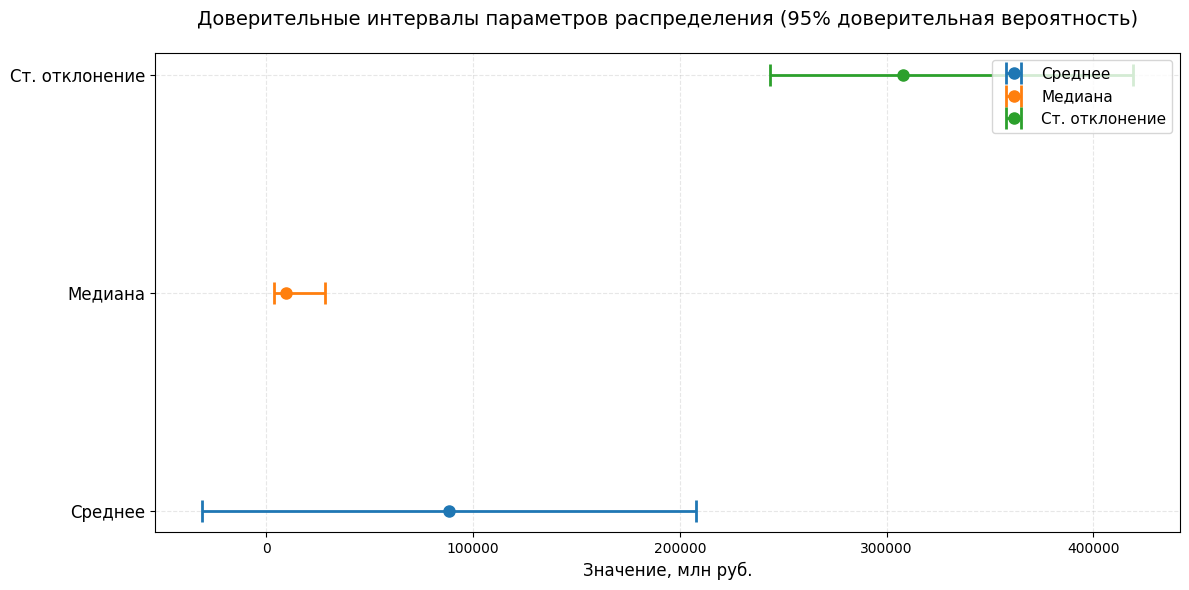

In [59]:
n = len(values_2024)
mean = np.mean(values_2024)
std = np.std(values_2024, ddof=1)
median = np.median(values_2024)

print(f"ПАРАМЕТРИЧЕСКИЕ ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (95%)")
# 1. Доверительный интервал для среднего (t-распределение)
t_critical = stats.t.ppf(0.975, n-1)
se_mean = std / np.sqrt(n)
ci_mean = [mean - t_critical * se_mean, mean + t_critical * se_mean]
print(f"Среднее арифметическое:")
print(f"Результат: [{ci_mean[0]:.1f}; {ci_mean[1]:.1f}] млн руб.")

# 2. Доверительный интервал для медианы
k = int(np.floor((n - 1.96 * np.sqrt(n)) / 2))
if k < 0:
     k = 0
sorted_data = np.sort(values_2024)
ci_median = [sorted_data[k], sorted_data[n - k - 1]]
print(f"\nМедиана:")
print(f"Результат: [{ci_median[0]:.1f}; {ci_median[1]:.1f}] млн руб.")

# 3. Доверительный интервал для стандартного отклонения
ci_std = [np.sqrt(ci_variance[0]), np.sqrt(ci_variance[1])]
print(f"\nСтандартное отклонение:")
print(f"Результат: [{ci_std[0]:.1f}; {ci_std[1]:.1f}] млн руб.")
print()

fig, ax = plt.subplots(figsize=(12, 6))

parameters = ['Среднее', 'Медиана', 'Ст. отклонение']
intervals = [ci_mean, ci_median, ci_std]
point_estimates = [mean, median, std]

for i, (param, interval, point) in enumerate(zip(parameters, intervals, point_estimates)):
    # Расчет ошибок для отображения
    left_error = point - interval[0]
    right_error = interval[1] - point
    
    ax.errorbar(point, i, xerr=[[left_error], [right_error]],
                fmt='o', capsize=8, capthick=2, elinewidth=2,
                label=f'{param}', markersize=8)

ax.set_yticks(range(3))
ax.set_yticklabels(parameters, fontsize=12)
ax.set_xlabel('Значение, млн руб.', fontsize=12)
ax.set_title('Доверительные интервалы параметров распределения (95% доверительная вероятность)', 
             fontsize=14, pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='upper right')

plt.tight_layout()
plt.show()

## 2. Дополнительная часть

### 2.1 Сравнительная оценка числовых показателей


2022 год:
  Общая_сумма: 1_326_102.9 млн руб.
  Среднее: 47_360.8 млн руб.
  Медиана: 5_398.1 млн руб.
  Стандартное_отклонение: 139_941.3 млн руб.

2023 год:
  Общая_сумма: 1_994_351.9 млн руб.
  Среднее: 71_226.9 млн руб.
  Медиана: 6_245.1 млн руб.
  Стандартное_отклонение: 241_500.6 млн руб.

2024 год:
  Общая_сумма: 2_472_619.3 млн руб.
  Среднее: 88_307.8 млн руб.
  Медиана: 9_415.8 млн руб.
  Стандартное_отклонение: 308_076.4 млн руб.


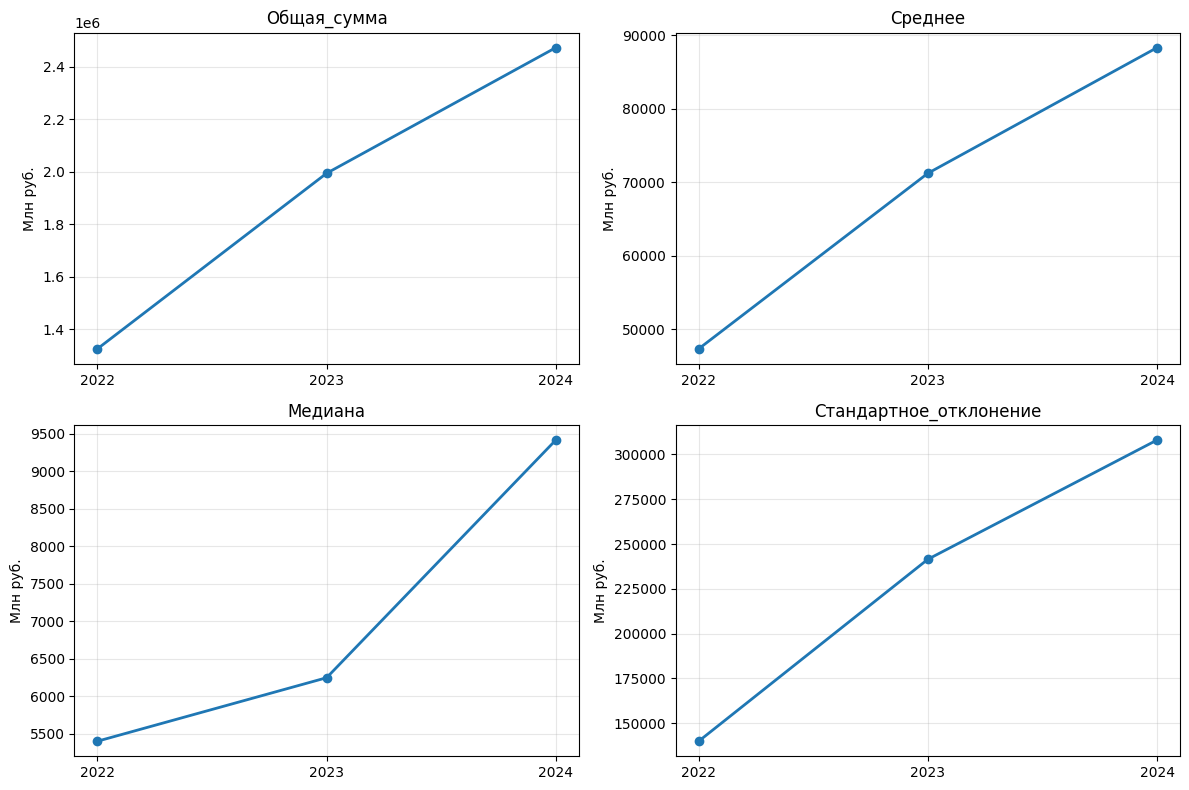

In [8]:
titles = ['Общая_сумма', 'Среднее', 'Медиана', 'Стандартное_отклонение']

def calculate_basic_stats(values, year_name):
    return {
        'Год': year_name,
        titles[0]: np.sum(values),
        titles[1]: np.mean(values),
        titles[2]: np.median(values),
        titles[3]: np.std(values, ddof=1)
    }

stats_2022 = calculate_basic_stats(values_2022, '2022')
stats_2023 = calculate_basic_stats(values_2023, '2023')
stats_2024 = calculate_basic_stats(values_2024, '2024')
for stats in [stats_2022, stats_2023, stats_2024]:
    print(f"\n{stats['Год']} год:")
    print(f"  {titles[0]}: {stats[titles[0]]:_.1f} млн руб.")
    print(f"  {titles[1]}: {stats[titles[1]]:_.1f} млн руб.")
    print(f"  {titles[2]}: {stats[titles[2]]:_.1f} млн руб.")
    print(f"  {titles[3]}: {stats[titles[3]]:_.1f} млн руб.")

plt.figure(figsize=(12, 8))

for i, title in enumerate(titles, 1):
    plt.subplot(2, 2, i)
    values = [stats_2022[title], stats_2023[title], stats_2024[title]]
    plt.plot(['2022', '2023', '2024'], values, marker='o', linewidth=2)
    plt.title(title)
    plt.ylabel('Млн руб.')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.2 Расчет дополнительных показателей

In [12]:
def gini_coefficient(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    g = 0.5 * rmad
    return g

std = np.std(values_2024, ddof=1)
mean = np.mean(values_2024)
me = np.median(values_2024)

cv = (std / mean) * 100
pearson_asym = 3 * (mean - me) / std
gini_main = gini_coefficient(values_2024)
print(f"Коэффициент Джини: {gini_main:.3f}")
print(f"Коэффициент вариации: {cv:.3f}")
print(f"Коэффициент асимметрии Пирсона: {pearson_asym:.3f}")

Коэффициент Джини: 0.859
Коэффициент вариации: 348.866
Коэффициент асимметрии Пирсона: 0.768
